In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd

# Update the file path to where fer2013.csv is located in your Google Drive
try:
    (X_train, y_train), (X_test, y_test) = pd.read_csv('/content/drive/MyDrive/YOUR_FILE_PATH_IN_DRIVE/fer2013.csv')
except FileNotFoundError:
    print("Error: fer2013.csv not found. Please make sure the file path is correct.")
    print("Also, the fer2013 dataset is not typically loaded this way. It's usually a single CSV with pixel values and labels.")
    print("Consider using the data loading code I provided earlier which parses the pixel data.")

X_train.shape

FileNotFoundError: [Errno 2] No such file or directory: 'fer2013.csv'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
classes[8]

'ship'

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

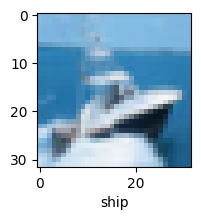

In [ ]:
plot_sample(X_train, y_train, 8)

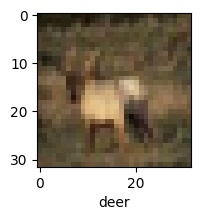

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation= 'sigmoid')
])

ann.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3055 - loss: 1.9237
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4232 - loss: 1.6359
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4501 - loss: 1.5565
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4752 - loss: 1.4896
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4978 - loss: 1.4293


In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4640 - loss: 1.5071


[1.5093117952346802, 0.4627000093460083]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.47      0.53      1000
           1       0.41      0.78      0.54      1000
           2       0.44      0.30      0.36      1000
           3       0.37      0.33      0.35      1000
           4       0.55      0.26      0.35      1000
           5       0.51      0.23      0.32      1000
           6       0.54      0.51      0.52      1000
           7       0.35      0.74      0.48      1000
           8       0.69      0.48      0.57      1000
           9       0.48      0.53      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.45     10000
weighted avg       0.50      0.46      0.45     10000



In [ ]:
# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the CNN model
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Train the CNN model
cnn.fit(X_train, y_train, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3835 - loss: 1.6852
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5963 - loss: 1.1447
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6554 - loss: 0.9797
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6906 - loss: 0.8912
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7124 - loss: 0.8215
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7385 - loss: 0.7552
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7570 - loss: 0.7045
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7717 - loss: 0.6559
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7775 - loss: 0.6306
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8011 - loss: 0.5756


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6998 - loss: 0.9162


[0.9178375005722046, 0.6970000267028809]

In [ ]:
from sklearn.metrics import classification_report
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.67      0.73      1000
           1       0.83      0.81      0.82      1000
           2       0.56      0.61      0.59      1000
           3       0.49      0.52      0.51      1000
           4       0.65      0.58      0.62      1000
           5       0.61      0.61      0.61      1000
           6       0.74      0.79      0.77      1000
           7       0.77      0.73      0.75      1000
           8       0.76      0.84      0.80      1000
           9       0.78      0.81      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

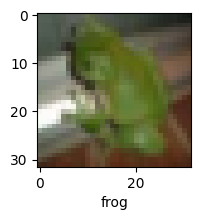

In [ ]:

plot_sample(X_test, y_test, 7)

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[1.6720229e-03, 7.2128918e-05, 1.5793449e-03, 9.5788050e-01,
        1.0753103e-04, 1.1798525e-02, 9.4197867e-03, 1.6404593e-06,
        1.7461302e-02, 7.2614980e-06],
       [2.3430036e-03, 1.7648869e-03, 1.1749272e-07, 1.7219543e-07,
        4.0570969e-09, 2.4564806e-10, 4.3642622e-08, 2.7180249e-09,
        9.9530339e-01, 5.8832677e-04],
       [6.0451638e-02, 2.4170874e-01, 2.0737874e-03, 3.6988598e-03,
        3.6153181e-03, 1.3880848e-04, 1.0269908e-03, 1.7702706e-03,
        6.7738110e-01, 8.1345085e-03],
       [1.8387680e-01, 9.8499693e-02, 5.7813479e-03, 2.6712548e-03,
        9.8945654e-04, 1.4804174e-04, 4.6783630e-04, 7.7214863e-06,
        7.0619732e-01, 1.3605384e-03],
       [2.0407517e-06, 4.3882433e-06, 4.5888098e-03, 1.3638009e-02,
        5.5541648e-03, 4.4573547e-04, 9.7576207e-01, 1.4947113e-06,
        3.2271917e-06, 2.2526825e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(6)]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

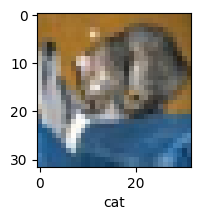

In [ ]:
plot_sample(X_test, y_test, 0)

In [ ]:
classes[y_classes[0]]

'cat'